In [166]:
import matplotlib.pyplot as plt
import numpy as np



In [167]:
def getMetrics(): return {'Accuracy': [], 'Precision':[], 'Recall' : [], 'F1': [], 'AUC': []}
undersamples = [[], [], []]
batches = [1, 5, 10, 50, 100]

for i in range(5):
    ptr = -1
    j  = -1
    curr_dict = getMetrics()
    with open(f'resultStatistic_P_us_{batches[i]}.txt', 'r') as fhand:
        while True:
            line = fhand.readline()
            if not line: 
                if curr_dict: undersamples[j].append(curr_dict)
                break
            if line.startswith('='):
                ptr += 1
                if j >= 0: undersamples[j].append(curr_dict)
                j += 1
                curr_dict = getMetrics()
                continue
            if not line.startswith('\t'): continue

            labels = line.strip().split(':')
            if labels[0] == 'TP': continue
            curr_dict[labels[0]].append(float(labels[1].strip()))
    ptr += 1
            

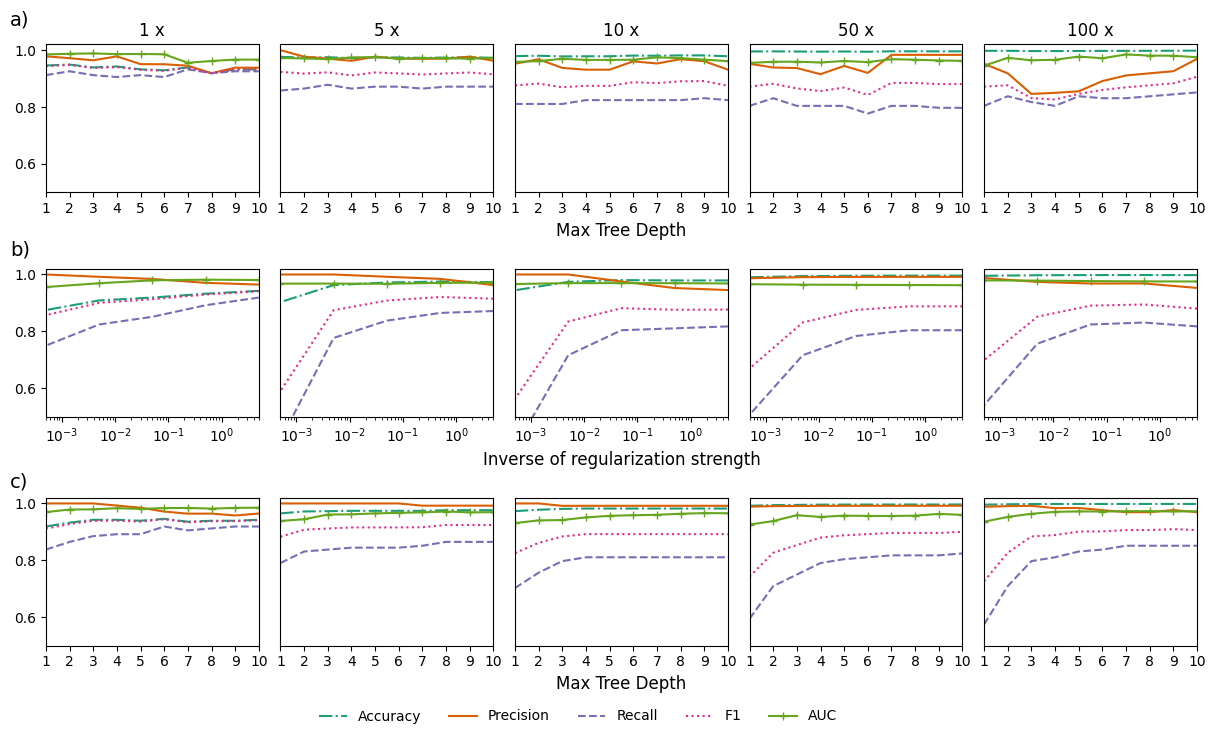

In [186]:
linestyle = ['-.', '-', '--', ':', '+-']
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
cmap = plt.get_cmap('Dark2')
color = cmap(np.arange(7))
fig, axs = plt.subplots(nrows=3, ncols=5, 
                        figsize = (12, 7), 
                        layout = 'constrained')

i = -1
for ax in axs.flatten():
    ax.set_ylim(0.5, 1.02)
    i += 1
    if (i < len(batches)):
        ax.set_title(f'{batches[i]} x')
    if (i == 7): 
        ax.set_xlabel('Inverse of regularization strength\n', fontsize=12)
    elif (i == 2 or i == 12):
        ax.set_xlabel('Max Tree Depth\n', fontsize=12)
    else:
        ax.set_xlabel('')
    
    if (i // 5 == 1):
        ax.set_xlim(0.0005, 5)
        ax.set_xscale('log')
        for k in range(5):
            ax.plot([5 * (0.1 ** j) for j in range(5)],  
                    undersamples[i // 5][i % 5][labels[k]],
                    linestyle[k], 
                    label=labels[k], 
                    color=color[k])

    else:
        ax.set_xticks(np.arange(1, 11, 1))
        ax.set_xlim(1, 10)       
        for k in range(5):
            ax.plot([j for j in range(1, 11)], 
                    undersamples[i // 5][i % 5][labels[k]], 
                    linestyle[k],
                    label=labels[k], 
                    color=color[k])

    if (i % 5 == 0):
        continue
    ax.set_yticks([])
    ax.set_ylabel('')

fig.text(0, 0.99, 'a)', fontsize=14)
fig.text(0, 0.66, 'b)', fontsize=14) 
fig.text(0, 0.33, 'c)', fontsize=14) 
lines1, labels1 = ax.get_legend_handles_labels()
fig.legend(lines1, 
           labels1, 
           ncols=5, 
           frameon = False,
           bbox_to_anchor=(0.7, 0.03, 0, 0))

fig.savefig('./image/us_pre.png', bbox_inches = 'tight', dpi= 300)